In [1]:
import pandas as pd


In [2]:
tickers = [
            'JPM',
            'BAC',
            'C',
            'WFC',
            'GS',
            ]

In [3]:
bank_data = pd.read_json("./viz.json")

In [4]:
pd.DataFrame(bank_data)


,JPM,BAC,C,WFC,GS
chart,"[{'date': '2018-06-06', 'uClose': 110.36, 'uOp...","[{'date': '2018-06-06', 'uClose': 30.04, 'uOpe...","[{'date': '2018-06-06', 'uClose': 68.23, 'uOpe...","[{'date': '2018-06-06', 'uClose': 55.58, 'uOpe...","[{'date': '2018-06-06', 'uClose': 232.23, 'uOp..."


In [5]:
pd.DataFrame(bank_data['JPM']['chart'])

,date,uClose,uOpen,uHigh,uLow,uVolume,close,open,high,low,volume,currency,change,changePercent,label,changeOverTime
0,2018-06-06,110.36,108.66,110.74,108.48,15453563,110.36,108.66,110.74,108.48,15453563,,0.00,0.0000,"Jun 6, 18",0.000000
1,2018-06-07,110.80,111.18,111.50,110.03,13444427,110.80,111.18,111.50,110.03,13444427,,0.44,0.3987,"Jun 7, 18",0.003987
2,2018-06-08,111.11,110.62,111.14,110.06,10383168,111.11,110.62,111.14,110.06,10383168,,0.31,0.2798,"Jun 8, 18",0.006796
3,2018-06-11,110.83,111.12,111.91,110.77,12642897,110.83,111.12,111.91,110.77,12642897,,-0.28,-0.2520,"Jun 11, 18",0.004259
4,2018-06-12,110.19,111.14,111.53,109.52,15294082,110.19,111.14,111.53,109.52,15294082,,-0.64,-0.5775,"Jun 12, 18",-0.001540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2020-06-01,98.60,97.75,99.51,97.38,15207495,98.60,97.75,99.51,97.38,15207495,,1.29,1.3257,"Jun 1, 20",-0.106560
500,2020-06-02,98.93,100.28,100.42,97.93,21194963,98.93,100.28,100.42,97.93,21194963,,0.33,0.3347,"Jun 2, 20",-0.103570
501,2020-06-03,104.27,101.58,104.92,101.06,25941090,104.27,101.58,104.92,101.06,25941090,,5.34,5.3978,"Jun 3, 20",-0.055183
502,2020-06-04,106.44,103.82,106.61,102.79,26784723,106.44,103.82,106.61,102.79,26784723,,2.17,2.0811,"Jun 4, 20",-0.035520


In [6]:
series_list = []

#Parsing a panda Series of closing prices for all the tickers
for ticker in tickers:
    series_list.append(pd.DataFrame(bank_data[ticker]['chart'])['close'])

#Appending the date column
series_list.append(pd.DataFrame(bank_data['JPM']['chart'])['date'])

#Setting the values of the columns
column_names = tickers.copy()
column_names.append('Date')

#Merging into one single dataframe
bank_data = pd.concat(series_list, axis=1)

#Setting column names and date as index 
bank_data.columns = column_names

bank_data.set_index('Date', inplace = True)

In [7]:
bank_data

,JPM,BAC,C,WFC,GS
Date,,,,,
2018-06-06,110.36,30.04,68.23,55.58,232.23
2018-06-07,110.80,30.09,68.45,55.63,233.45
2018-06-08,111.11,30.01,68.47,55.68,233.39
2018-06-11,110.83,30.06,68.11,55.51,234.09
2018-06-12,110.19,29.90,67.61,55.38,232.63
...,...,...,...,...,...
2020-06-01,98.60,24.61,49.45,27.09,199.93
2020-06-02,98.93,24.84,50.84,27.40,204.14
2020-06-03,104.27,25.99,53.34,28.83,210.57


In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

([<matplotlib.axis.XTick at 0x21e422ace08>,
 [Text(0, 0, 'JPM'),
  Text(0, 0, 'BAC'),
  Text(0, 0, 'C'),
  Text(0, 0, 'WFC'),
  Text(0, 0, 'GS')])

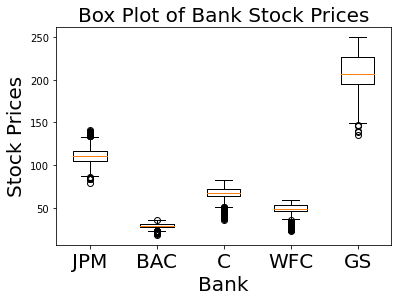

In [19]:
#Creating boxplots along columns
plt.boxplot(bank_data.transpose())

#Setting title for the boxplot
plt.title('Box Plot of Bank Stock Prices',fontSize = 20)

#Setting axes labels
plt.xlabel("Bank",fontSize = 20)
plt.ylabel("Stock Prices",fontSize =20)

#Setting x ticks
ticks = range(1,len(bank_data.columns)+1)
labels = list(bank_data.columns)
plt.xticks(ticks,labels,fontsize = 20)


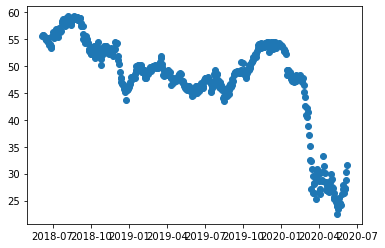

In [22]:
#Initializing series
dates = bank_data.index.to_series()
dates = [pd.to_datetime(d) for d in dates]

#Fetching WFC stock prices
WFC_stock_prices = bank_data['WFC']
plt.scatter(dates,WFC_stock_prices)
#Defin
plt.title("Wells Fargo Stock Price",fontSize = 20)
plt.ylabel("Stock Price", fontsize=20)
plt.xlabel("Date", fontsize=20)
